<center><h1><b><font size="6">Project List</font></b></h1></center>

<center><h1><b><font size="2">Customer Segmentation is a popular application of unsupervised learning. Using clustering, companies identify segments of customers to target the potential user base. They divide customers into groups according to common characteristics like gender, age, interests, and spending habits so they can market to each group effectively. By understanding this, you can better understand how to market and serve them. This is similar and related but slightly different from the UX methodology of creating user personas: creating your ideal customers, their pain points, a defining quote, and so on, to understand their perspective.</font></b></h1></center>

#### Tools: Python

**Techniques**: K-means clustering, Matplotlib, seaborn

**Data-set**: Customers.csv dataset

### Imports

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### import the data 

In [6]:
df = pd.read_csv("./data/Customers.csv")

In [9]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [10]:
#last 5 rows
df.tail(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [11]:
#shape of the dataset
df.shape

(200, 5)

In [12]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Unsupervised Learning approach

In [13]:
#create a separate data frame
X = df.iloc[:, [3,4]].values

In [14]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### KMeans algorithm

### finding the optimal values using the elbow method

In [22]:
from sklearn.cluster import KMeans
wcss = []

In [23]:
#iteration
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #seg data

In [24]:
#wcss values
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30259.65720728547,
 25050.832307547527,
 21862.09267218289,
 19657.783608703958]

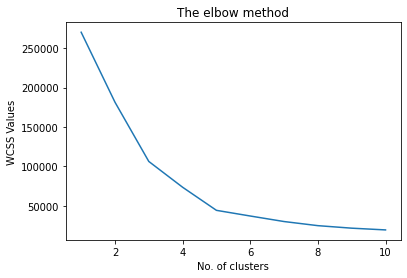

In [25]:
#display the elbow plot
plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS Values")
plt.show()

### Training a model using unsupervised learning K-Means algorithm


#### Initializing our K-Means Model with selected optimal No. of clusters

In [35]:
# the model
kmeansmodel = KMeans(n_clusters = 5, init = 'k-means++', random_state=0)

In [36]:
# the prediction & fit the model
y_kmeans = kmeansmodel.fit_predict(X)

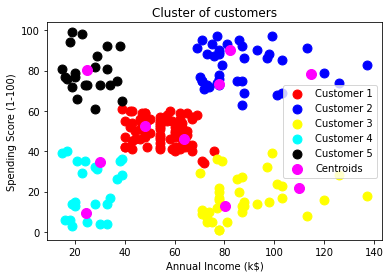

In [41]:
# Visualización de los clusters
# 
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=80, c='red', label='Customer 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=80, c='blue', label='Customer 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=80, c='yellow', label='Customer 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=80, c='cyan', label='Customer 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=80, c='black', label='Customer 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='magenta', label='Centroids')
plt.title("Cluster of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

### Resume :

**In the graph we can see**: 

1.**high salaries**, lower spending. 

On the other hand, 

2.**low average salaries**, they spend more.

3.**By managing this information**, we know our customers better and can promote our products more effectively.